In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import seaborn as sns

In [7]:
mnists=tf.keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test)=mnists.load_data()

In [8]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
X_train_full.shape


(60000, 28, 28)

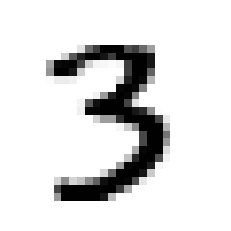

In [10]:
plt.imshow(X_train_full[10000],cmap='binary')
plt.axis('off')
plt.show()

<AxesSubplot:>

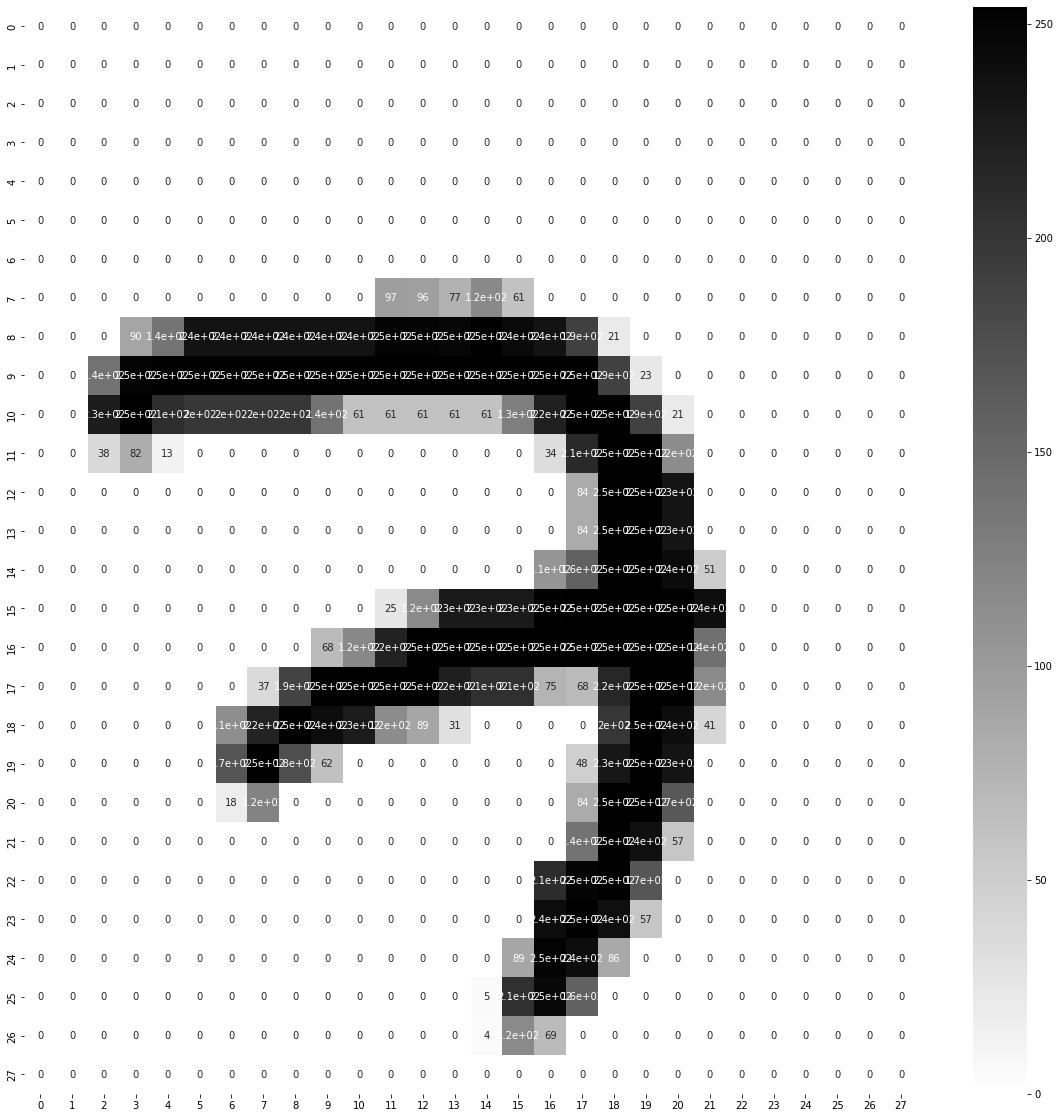

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train_full[5000],annot=True,cmap='binary')

In [12]:
# divinding and scaling data between 0 to 1
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [13]:
X_test=X_test/255

In [14]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


In [15]:
LAYERS= [tf.keras.layers.Flatten(input_shape=[28,28],name='inputlayer'),
         tf.keras.layers.Dense(300,activation='relu',name='hiddenlayer1'),
         tf.keras.layers.Dense(100,activation='relu',name='hiddenlayer2'),
         tf.keras.layers.Dense(10,activation='softmax',name='outputlayer')]
model_clf=tf.keras.models.Sequential(LAYERS)

In [16]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="ADAM"
METRICS=['accuracy']


In [18]:
model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [19]:
hidden1=model_clf.layers[1]
weights,biases=hidden1.get_weights()

In [20]:
EPOCHS=5
VALIDATION_SET=(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 11s 3ms/step - loss: 0.2128 - accuracy: 0.9376 - val_loss: 0.1012 - val_accuracy: 0.9704
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0872 - accuracy: 0.9728 - val_loss: 0.0961 - val_accuracy: 0.9714
Epoch 3/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0589 - accuracy: 0.9805 - val_loss: 0.0781 - val_accuracy: 0.9780
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0445 - accuracy: 0.9851 - val_loss: 0.0729 - val_accuracy: 0.9786
Epoch 5/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0347 - accuracy: 0.9888 - val_loss: 0.0702 - val_accuracy: 0.9788


In [21]:
import time
import os
def savemodel_path(model_dir="/content/SAVED_MODEL/"):
  os.makedirs(model_dir,exist_ok=True)
  filename=time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path=os.path.join(model_dir,filename)
  print(f"your model will be saved at the following location\n{model_path}")
  return model_path

In [22]:
model_clf.save(savemodel_path())

your model will be saved at the following location
/content/SAVED_MODEL/Model_2023_03_16_11_16_17_.h5


In [23]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.212840,0.937618,0.101154,0.9704
1,0.087155,0.972836,0.096090,0.9714
2,0.058924,0.980491,0.078063,0.9780
3,0.044517,0.985091,0.072852,0.9786
4,0.034731,0.988818,0.070177,0.9788


In [24]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0753 - accuracy: 0.9781


[0.07534292340278625, 0.9781000018119812]

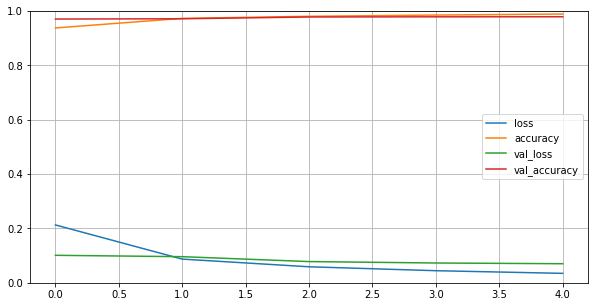

In [25]:
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [26]:
#Prediction 



In [27]:
prediction = model_clf.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [28]:
prediction

array([[3.29677369e-10, 4.77545754e-08, 3.60506185e-08, ...,
        9.99963880e-01, 2.09325002e-08, 3.20337822e-05],
       [1.85462604e-12, 3.06433563e-08, 1.00000000e+00, ...,
        6.03178228e-12, 5.94793702e-12, 3.30156113e-18],
       [3.10227977e-09, 9.99901533e-01, 7.76564377e-07, ...,
        8.68219213e-05, 1.01927408e-05, 1.09180198e-09],
       ...,
       [5.73581655e-13, 8.15858270e-10, 2.66443421e-12, ...,
        1.07989342e-08, 1.71701675e-08, 1.69985253e-06],
       [9.37624284e-11, 2.86879909e-10, 5.06296285e-13, ...,
        1.32962996e-09, 2.02472893e-05, 4.55423164e-11],
       [1.55140276e-11, 4.08411694e-13, 1.38245204e-14, ...,
        2.31671426e-13, 1.69788966e-12, 4.52614292e-12]], dtype=float32)

In [29]:
#lets see 6th value of x_test and prediction

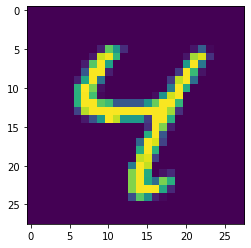

In [32]:
plt.imshow(X_test[6])
plt.show()

In [33]:
#from prediction

print('Probabilities: ', prediction[6])
print('Prediction: ', np.argmax(prediction[6]))

Probabilities:  [9.3368258e-10 7.9455862e-07 2.2259478e-08 2.4213000e-08 9.9951828e-01
 2.4629185e-07 3.3449805e-08 2.7209795e-05 1.1439027e-04 3.3892359e-04]
Prediction:  4
